# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def roll_a_dice(): 
    rolls_values = []
    values=[1,2,3,4,5,6]
    for i in range(10):
        rolls_values.append(random.choices(values))
    
    return pd.DataFrame(rolls_values, columns=['dice_value'])

In [3]:
dices = roll_a_dice()
dices.columns

Index(['dice_value'], dtype='object')

#### 2.- Plot the results sorted by value.

In [4]:
dices_sorted = dices.sort_values(by='dice_value', axis=0, ascending=True)

In [5]:
dices_sorted

,dice_value
2,1
7,1
8,1
9,1
5,4
1,5
4,5
6,5
0,6
3,6


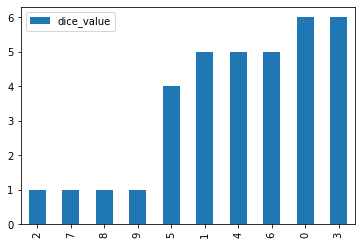

In [7]:
dices_sorted.plot(kind='bar')

### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [10]:
freq = dices_sorted['dice_value'].value_counts()

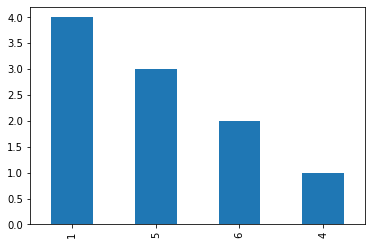

In [11]:
freq.plot(kind='bar')

There are some differences between graphs. The first graph describes each throw and then the value of each throw. However, the second graph contains the aggregated throws for each values. 

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
def mean_values(observations_df):
    return observations_df.sum()/len(observations_df)

In [13]:
mean_values(dices_sorted)

dice_value    3.5
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [14]:
freq = dices_sorted['dice_value'].value_counts()
mean_values(freq)

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [79]:
dices_sorted

,dice_value
0,1
5,1
6,2
7,4
8,4
1,5
2,5
3,5
4,5
9,6


In [46]:
def median_calculation(observations_df):
    if len(observations_df['dice_value'])%2==0: 
        index = len(observations_df)//2
        median_value = (observations_df['dice_value'][index] + (observations_df['dice_value'][index+1]))/2
        return float(median_value)
    else: # if the lenght is not an even number. 
        return float(observations_df['dice_value'][(len(observations_df)//2)+1])


In [102]:
(len(dices_sorted)-1)/2

4.5

In [103]:
len(dices_sorted)%2==0

True

In [53]:
median_calculation(dices_sorted)

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [54]:
def quartiles_calculation(dices_sorted):
    dices_sorted.sort_index(inplace=True)
    Q2 = median_calculation(dices_sorted)
    Q1_df = dices_sorted[dices_sorted['dice_value']<Q2]
    Q1 = median_calculation(Q1_df.reset_index(drop=True))
    Q3_df = dices_sorted[dices_sorted['dice_value']>Q2]
    Q3 = median_calculation(Q3_df.reset_index(drop=True))
    return Q1,Q2,Q3

In [55]:
Q1,Q2,Q3 = quartiles_calculation(dices_sorted)

In [56]:
Q1

1.0

In [57]:
Q2

4.5

In [58]:
Q3

5.0

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [64]:
## import os library to change the path in order to get the dataset. 
import os 
os.getcwd()
os.chdir("/home/ingrid/Documents/DA_Ironhack/Week4/lab-understanding-descriptive-stats/data/")

In [84]:
#Importing csv file
roll_dice_values = pd.read_csv('roll_the_dice_hundred.csv', index_col=0)

In [68]:
roll_dice_values.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


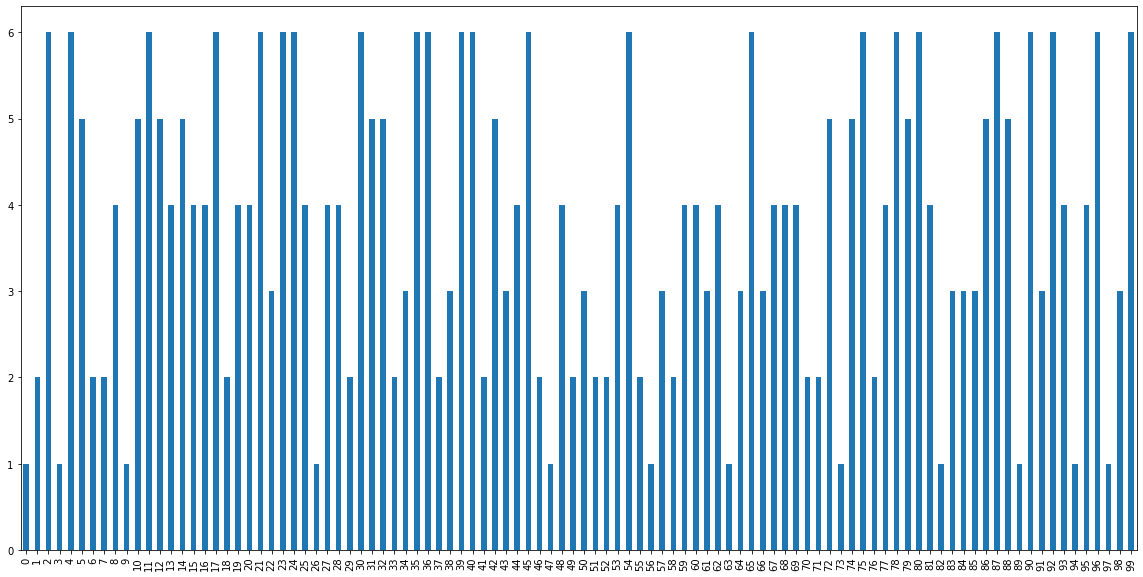

In [184]:
roll_dice_values.value.plot(kind='bar', figsize=(20,10))

It is better if we sort the values to see which have been the values that have appeared the most compared to the other ones. In this graph we can see that there the values that appear are random between 1 and 6, the values that a dice can get. 

In [173]:
sorted_values = roll_dice_values.sort_values(by='value')
sorted_values.head()

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1


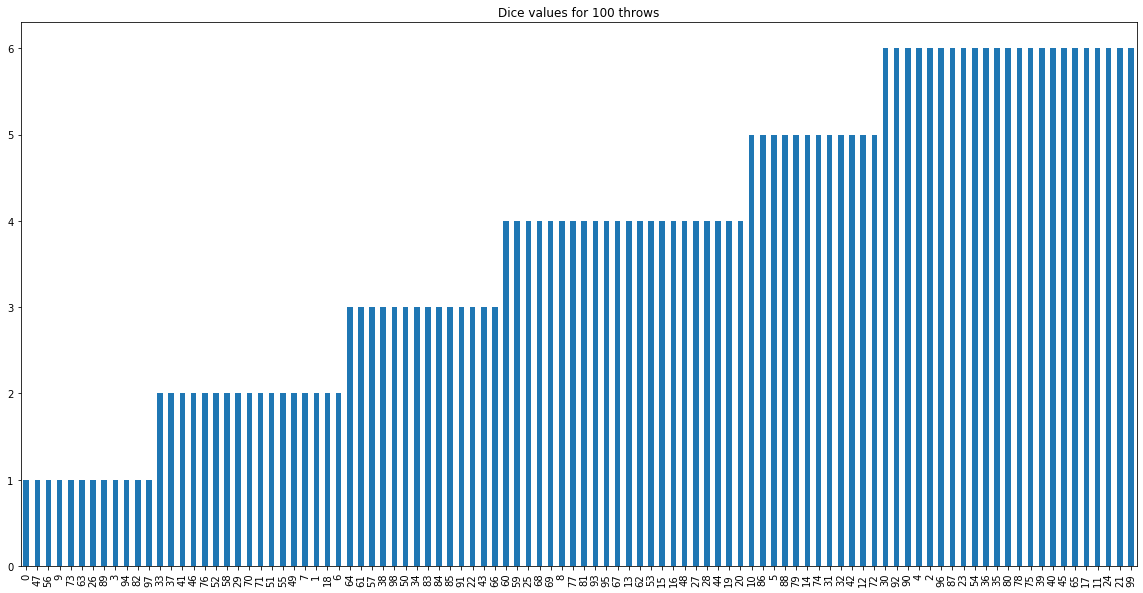

In [174]:
sorted_values.value.plot(kind='bar', title='Dice values for 100 throws', figsize=(20,10))


In [83]:
# https://markhneedham.com/blog/2018/09/18/matplotlib-remove-axis-legend/

From this graph we can see that, for example, the dice value 4 and 6 have appeared more than 5 and 3. However, these values are random. 

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [87]:
mean_values(sorted_values.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [115]:
freq = pd.DataFrame(sorted_values['value'].value_counts())
freq.sort_index(inplace=True) #we sort the indexes to graph a good frequency distribution

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

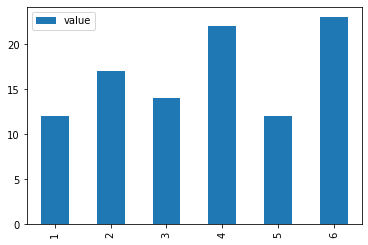

In [114]:
freq.plot(kind='bar')

From this graph we can see that there are some values that appear more than the others. However, each value has the same probability to appear in this graph, exactly 1/6. The mean value we have calculated is 3.74, being greater that 3, that should be the ideal mean. Looking againg at the graph, we can notice that numbers 4 and 6 appear more times thant 1,2 and 3, moving the mean value to a greater value than 3. 

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [117]:
os.getcwd() #We take a look on the current directory where we are currently working. 

'/home/ingrid/Documents/DA_Ironhack/Week4/lab-understanding-descriptive-stats/data'

In [120]:
thousand_dices = pd.read_csv('roll_the_dice_thousand.csv') #importing data 

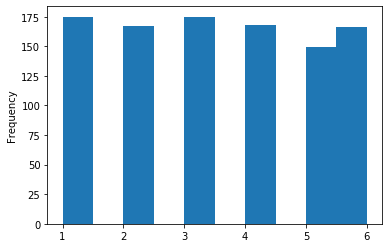

In [122]:
thousand_dices.value.plot(kind='hist')

Even if we throw 100 times or 1000 times, the probability to get each value is exactly 1/6. However, taking a look at this graph we can see that there this distribution is clearly more uniform that the one before, with 100 throws. By considering this, we can notice that, the more we throw the dices, the more we are approaching the theoretical probability distribution, also known as the population distribution. We can calculate the mean at this point, to see if the mean value is closer to 3 than before. 

In [123]:
mean_values(thousand_dices.value)

3.447

As we were expecting before, the mean value of throwing 1000 times the dice is closer to 3 that the previous one. 

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [127]:
ages_df = pd.read_csv('ages_population.csv')

ages_df.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


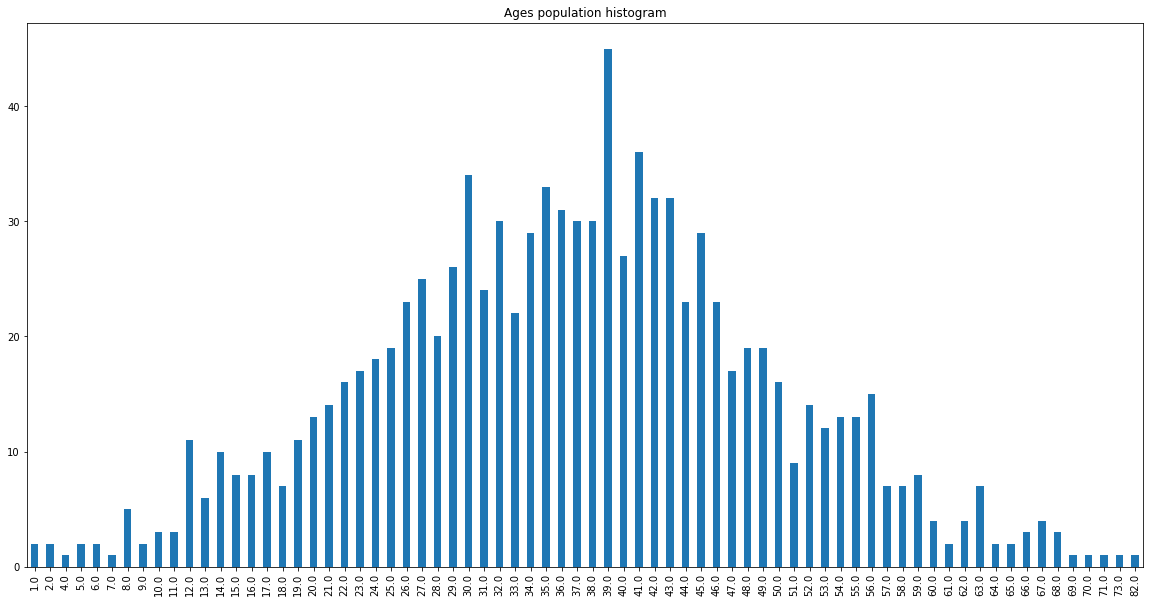

In [168]:
#calculation of the freq
ages_df_freq = pd.DataFrame(ages_df.observation.value_counts())
ages_df_freq.sort_index(inplace=True) #we sort the indexes to graph a good frequency distribution
ages_df_freq
#plotting the freq distribution
ages_df_freq.plot(kind='bar', title = 'Ages population histogram', legend = None,figsize=(20,10))


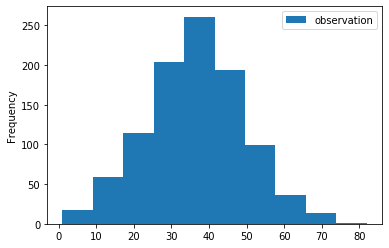

In [142]:
ages_df.plot(kind='hist')

From this graph we can see that the frequency distribution of ages in this population follows a normal distribution. Taking a look at this graph we can say that the mean value will be between 35 and 40, and the standard deviation will be around 10. 

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [152]:
print(f"The mean value of the ages frequency population is {mean_values(ages_df.observation)}")
print(f"The standard deviation of the ages frequency population is {ages_df.observation.std()}")

The mean value of the ages frequency population is 36.56
The standard deviation of the ages frequency population is 12.81649962597677


Yes, they fall between the ranges I guessed beforehand. However, the standard deviation is slightly greater than the value I thought. 

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

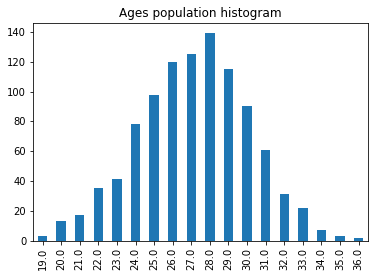

In [156]:
ages_df_2 = pd.read_csv('ages_population2.csv')
#calculation of the freq
ages_df_2_freq = pd.DataFrame(ages_df_2.observation.value_counts())
ages_df_2_freq.sort_index(inplace=True) #we sort the indexes to graph a good frequency distribution
#plotting the freq distribution
ages_df_2_freq.plot(kind='bar', title = 'Ages population histogram', legend = None )

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

From this graph we can see that there this population also follows a normal distribution. In this case, the range is more centered around ages 20-35. There are no values for ages greater than 36 and lower than 19. This population is very different from the previous one. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [157]:
print(f"The mean value of the ages frequency population is {mean_values(ages_df_2.observation)}")
print(f"The standard deviation of the ages frequency population is {ages_df_2.observation.std()}")

The mean value of the ages frequency population is 27.155
The standard deviation of the ages frequency population is 2.9698139326891835


In this case the values are greatly different than in the previous dataset. Here we can see that the mean is 27 year, since the mean in the first dataset was 36 years. Then, the standard deviation in this second sample is nearly 3 whereas in the first sample was 12. This second sample has a narrow standard deviation, due to the narrow sample ages it has. It seems that this area or neighborhood has a younger population thant the previous one. However, it seems that they don't have children. It could be an area close to universities.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [161]:
ages_df_3 = pd.read_csv("ages_population3.csv")

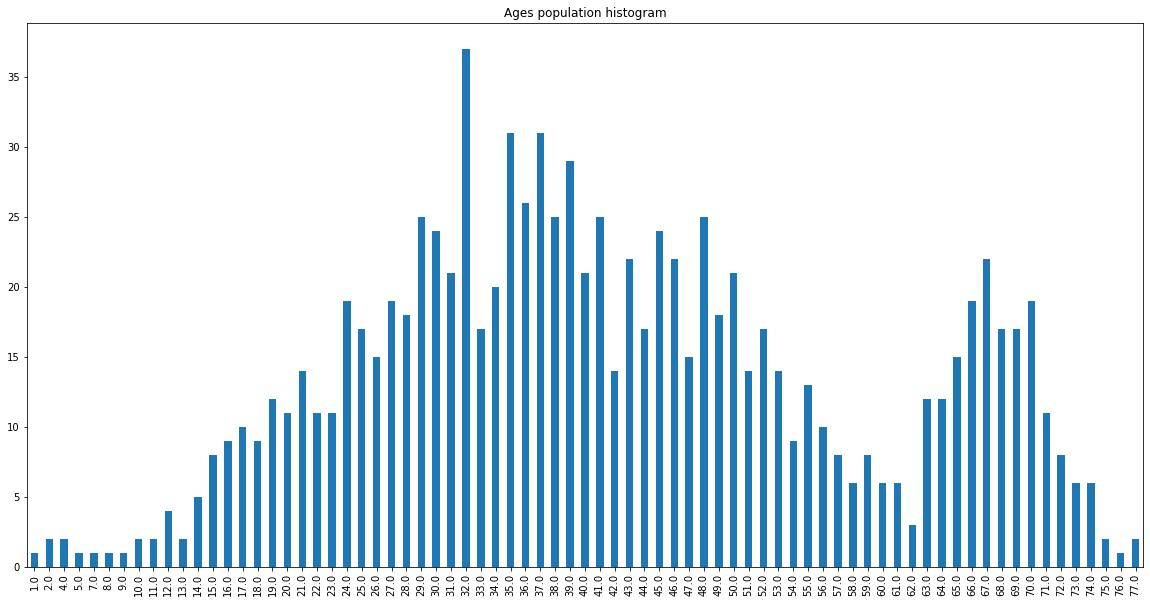

In [167]:
#calculation of the freq
ages_df_3_freq = pd.DataFrame(ages_df_3.observation.value_counts())
ages_df_3_freq.sort_index(inplace=True) #we sort the indexes to graph a good frequency distribution
#plotting the freq distribution
ages_df_3_freq.plot(kind='bar', title = 'Ages population histogram', legend = None, figsize=(20,10))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [163]:
print(f"The mean value of the ages frequency population is {mean_values(ages_df_3.observation)}")
print(f"The standard deviation of the ages frequency population is {ages_df_3.observation.std()}")

The mean value of the ages frequency population is 41.989
The standard deviation of the ages frequency population is 16.14470595986593


Here we can see that the distribution is no longer a normal distribution. It seems like there are two normal distributions overlapped one over the other. The first one is centered around 40 and the second normal is centered around 65. Moreover, the first normal starts at 58, approximately. 

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [165]:
ages_df_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


From here we can see that the first two quartiles (Q1 and Q2) contain the first normal distribution. By taking a look at Q3, we can see that it contains the second normal distribution, that starts at age 58. If we take a look at the quantile 80%, we can see that it is where the second normal distribution starts.

In this case, the mean and the median are slightly different but it doesn't have a huge difference between both values. The median value (Q2), is lower than the median since it is more robust and it is not affected of extreme values as the second normal distribution. However, by taking a look at the mean value, it is greater because it is affected by the second normal distribution, the 20% of the data. 

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [166]:
ages_df_3.quantile([0.15, 0.30, 0.45, 0.60, 0.80,0.90])

,observation
0.15,25.0
0.30,32.0
0.45,38.0
0.60,45.0
0.80,57.0
0.90,67.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [182]:
comparison_df = pd.concat([ages_df.describe(), ages_df_2.describe(), ages_df_3.describe()], axis=1)

comparison_df.columns = ['ages_1', 'ages_2', 'ages_3']

In [183]:
comparison_df

,ages_1,ages_2,ages_3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


Taking a look at this data we can see that the three sample have the same amount of observations, 1000. We can see that the mean in the three samples are slightly different, being the second area the youngest one, and the third one the oldest.  Both ages_1 and ages_3 have a sample where there are children and elderly people, whereas the second area doesn't. 

Furthermore, the standard deviation on ages_1 and 3 are similar since the range of ages they cover are quite similar. On the other hand, the standard deviation of the second area is narrower since, as we have said before, it doesn't contain a sample with a great range of ages. 